# Double Pendulum

#### The motivation of simulating a double pendulum is to simulate randomness. The motion of a double pendulum is unpredictable enough to use as random behavior. The motion of a single pendulum is really easy to predict because it’s just going to swing back and forth, but they are attached to each other, so their velocities and accelerations affect the other, which creates the erratic behavior

The top of the double pendulum will be at position (0,0)

The bottom of the first pendulum will be at point (x1, y1) and have length L1 with mass m1

The bottom of the second pendulum will be at point (x2, y2) and have length L2 with mass m2

Because the strings make an angle that is vertically downwards from the point of origin, the top of each pendulum. The top of the first pendulum is the very top while the top of the second pendulum is the location of the first pendulum's weight. This means that:

$x_1 = L_1sin(\theta_1),\ y_1 =  L_1cos(\theta_1)$

where $\theta_1$ is the angle of the first pendulum from the vertical downwards.

and

$x_2 = x_1 + L_2sin(\theta_2), y_2 = y_1 + L_2cos(\theta_2)$

## Initialization
Because x and y depend on θ, there is no need to include x and y in our equations, so the simple setup discussed above is initialized below.

We can also set the lengths to 1 and the masses to 0.1 as well as set the gravitational acceleration g to 9.81.

Additionally we can initialize the starting angles for the weights on the pendulum

In [1]:
L_1 = 1;
L_2 = 1;

theta_start_1 = pi/4;
theta_start_2 = pi/2;

g = 9.81;

m_1 = 0.1;
m_2 = 0.1;


## Explicit rk4 Function
Because we need to be constantly recalculating the angular velocity as well as the angle, we need a way to calculate the angular acceleration. There is an accepted equation to calculate the angular acceleration as such below:

$$\theta_1''= \frac{-g(2m_1 + m_2)sin\theta _1-m_2gsin(\theta _1 - 2\theta _2) - 2sin(\theta _1 - \theta _2)m_2(\theta _2'^2L_2 + \theta _1'^2 L_1 cos(\theta _1 - \theta _2))}{L_1(2m_1 + m_2 - m_2cos(2\theta _1 - 2\theta _2))} $$


$$ \theta _2'' = \frac{2sin(\theta _1 - \theta _2)(\theta _1'^2L_1(m_1 + m_2) + g(m_1 + m_2)cos\theta_1 + \theta _2'^2L_2m_2cos(\theta _1 - \theta _2))}{L_2(2m_1 + m_2 - m_2cos(2\theta _1 - 2\theta _2))}$$

Which we use to calculate the expected values for part of the rk4 method. Overall the Runge Kutta method offers a way to estimate the angular acceleration of the pendulum when given the previous values. It's more accurate than the Euler method, and often the rk2 method is all that's necessary.

Inside this function, we set the initial position using the initial angles given. Then we solve for the angular acceleration using the Runge Kutta method. Using the acceleration we solve for the angular velocity and then the angle. This method is repeated with the position being solved from the angle.

In [2]:
function explicit_rk4_double_pendulum(f::Function, ẏ::Vector, T_final::Real, N::Int)
    
    # initialization
    ω′ = zeros(2, N + 1);
    ω = zeros(2, N + 1);
    θ = zeros(2, N + 1);
    x = zeros(2, N + 1);
    y = zeros(2, N + 1);

    
    # time range
    t = range(0, T_final, N + 1)
    Δt = t[2] - t[1]
    
    θ[:,1] = ẏ
    y[:,1] = [L_1*cos(θ[1,1]);L_1*cos(θ[1,1]) + L_2*cos(θ[2,1])];
    x[:,1] = [L_1*sin(θ[1,1]); L_1*sin(θ[1,1]) + L_2*sin(θ[2,1])];
    
    for k = 1:N
        vals = [θ[1,k], θ[2,k], ω[1,k], ω[2,k]];
        
        k1 = f(vals);
        k2 = f(vals .+ k1 .* Δt/2);
        k3 = f(vals .+ k2 .* Δt/2);
        k4 = f(vals .+ k3 .* Δt);

        new_vals = vals .+ (k1 + 2*k2 + 2*k3 + k4) * Δt/6;
        
        θ[1,k+1] = new_vals[1];
        θ[2,k+1] = new_vals[2];
        ω[1,k+1] = new_vals[3];
        ω[2,k+1] = new_vals[4];
        ω′[1,k+1] = ω[1,k+1] - ω[1,k];
        ω′[2,k+1] = ω[2,k+1] - ω[2,k];
        
        
        x[:, k + 1] = [L_1 * sin(θ[1,k+1]); (L_1 * sin(θ[1, k + 1]) + L_2 * sin(θ[2, k + 1]))];
        y[:, k + 1] = [L_1 * cos(θ[1,k+1]); (L_1 * cos(θ[1, k + 1]) + L_2 * cos(θ[2, k + 1]))];
        #        print(k , ": " ,ω[:,k],"\n");
    end

    return t,ω′, ω, θ, x, y
end

explicit_rk4_double_pendulum (generic function with 1 method)

In [3]:
function find_g(vals)
    theta_1 = vals[1]
    theta_2 = vals[2]
    omega_1 = vals[3]
    omega_2 = vals[4]
    g1 = (-g * (2 * m_1 + m_2) * sin(theta_1) -m_2 * g * sin(theta_1 - 2 * theta_2) - 2 * sin(theta_1 - theta_2) * m_2 * (omega_2^2 * L_2 + omega_1^2 * L_1 * cos(theta_1-theta_2))) / (L_1 * (2 * m_1 + m_2 - m_2 * cos(2 * theta_1 - 2 * theta_2)));
    g2 = 2 * sin(theta_1 - theta_2) * (omega_1^2 * L_1 * (m_1 + m_2) + g * (m_1 + m_2) * cos(theta_1) + omega_2^2 * L_2 * m_2 * cos(theta_1 - theta_2)) / (L_2 * (2 * m_1 + m_2 - m_2 * cos(2 * theta_1 - 2 * theta_2)));
    return [omega_1, omega_2, g1, g2];
end
N = 1000

t_vals,ω′_vals, ω_vals, θ_vals, x_vals, y_vals = explicit_rk4_double_pendulum(    

    find_g,

    # value of ẏ
    [theta_start_1; theta_start_2],

    # value of T_final
    100 * π,

    # value of N
    N,);


### Height vs Time

Below we can see that as time goes on, the y value for the second weight tends to settle around y = 2, which is the 2 lengths added together, meaning that the angle is getting closer and closer to 0, shown directly after.

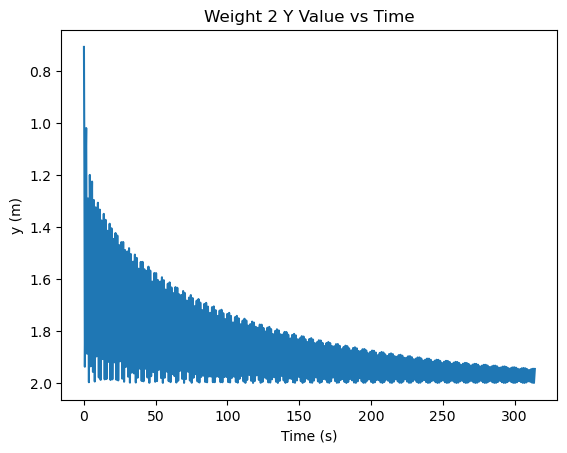

In [4]:
using PyPlot
#y_vals = y_vals[:, 121];
val = 0.012566370614359173;
plot(t_vals, y_vals[2, :]);
title("Weight 2 Y Value vs Time");
xlabel("Time (s)");
ylabel("y (m)");
plt.gca().invert_yaxis()





We can also see that as time goes on the angle starts to go towards 0, which makes sense because obviously the system should be losing energy as time increases.

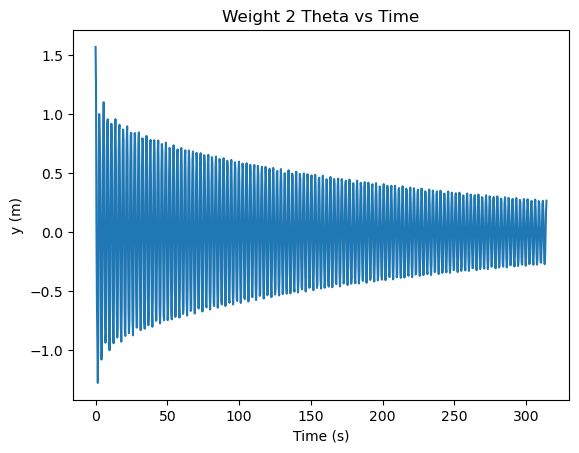

In [5]:
plot(t_vals, θ_vals[2,:]);
title("Weight 2 Theta vs Time");
xlabel("Time (s)");
ylabel("y (m)");

### Angular Acceleration vs Time
As time increases, the angular acceleration also tends to 0, which again makes sense because the energy in the system is technically decreasing.

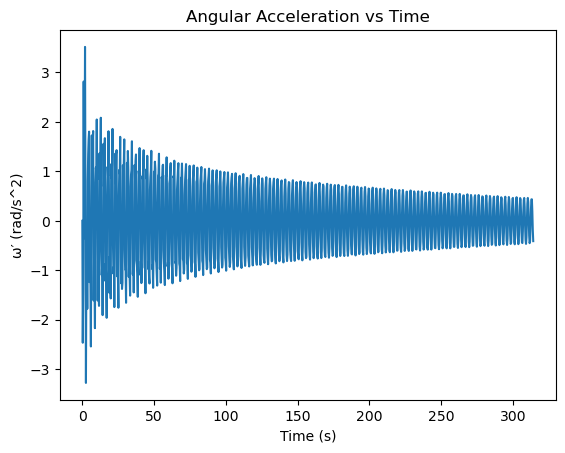

In [6]:
plot(t_vals, ω′_vals[2,:]);
title("Angular Acceleration vs Time");
xlabel("Time (s)")
ylabel("ω′ (rad/s^2)");

### Double Pendulum in React JavaScript

Additionally, the behavior of the double pendulum can be observed via http://www.wisinski.dev/double-pendulum-project where the starting position can be customized based on the order of clicks. This application that I coded is easy to visualize how changing a small starting value can impact the erratic behavior of the double pendulum. The path of the second weight is also traced to really visualize the behavior over time, but it disappears after a certain point.

The behavior can be paused with the pause button, so that the path can be observed easily. Then the behavior can be unpaused, and it will continue. Eventually, it will reach a point where it's barely moving, but initially the behavior will be active and unpredictable.